## Settings for plots

In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Change these to plot for different agents and environments
AGENT_NAME = "ForwardKL"
ENV_NAME = "Pendulum-v0"

# Set the directory containing all resutlts, the directory with the results to look at, and the filename of the file containing the data
RESULTS_FILE = "data.pkl"
RESULTS_DIR = "/home/samuel/Documents/Actor-Expert/RLControl/results/Safe"
EXPERIMENT_DIR = f"{ENV_NAME}_{AGENT_NAME}results"
DATA_FILE = os.path.join(RESULTS_DIR, EXPERIMENT_DIR, RESULTS_FILE)

# Load in the data to plot
with open(DATA_FILE, "rb") as in_file:
        data = pickle.load(in_file)

# Get the number of runs and number of hyperparameter sweeps
NUM_RUNS = len(data["experiment_data"][0]["runs"])  # number of runs per hyperparameter setting
HP_SWEEPS = range(len(data["experiment_data"]))  # the hyperparameter setting indices to plot


## Function Definitions

In [2]:
def get_results_for_experiment(data, hp_sweeps=[0]):
    """
    Gets all the results of the experiments, given the experiment data file
    
    Parameters
    ----------
    data : dict
        The Python dictionary generated from the experiment runs
    hp_sweeps : iter of int
        The indices of hyperparameter settings. The function returns a matrix of mean rewards where each row i of the matrix is 
        mean rewards of the corresponding hyperparameter setting corresponding to the integer at hp_sweeps[i]. 

    Return
    ------
    2-tuple of array_like
        The mean offline rewards and std offline rewards in the form (N, R, C) where N is the number of hyperparameter settings, R is the number of 
        runs, and C is the number of offline evaluation points 
    """
    # Create the base lists to store all data in
    all_mean_rewards = []
    all_std_rewards = []    
    
    for hp_sweep in hp_sweeps:
        hp_run_means = []
        hp_run_stds = []   
        for j in range(len(data["experiment_data"][hp_sweep]["runs"])):
            # Get the data from each run
            hp_run_means.append(data["experiment_data"][hp_sweep]["runs"][j]["eval_episode_mean_rewards"])
            hp_run_stds.append(data["experiment_data"][hp_sweep]["runs"][j]["eval_episode_mean_rewards"])

        all_mean_rewards.append(hp_run_means)
        all_std_rewards.append(hp_run_stds)

    return np.array(all_mean_rewards), np.array(all_std_rewards)


print(get_results_for_experiment(data, HP_SWEEPS)[0].shape)

(36, 3, 21)


In [3]:
def get_best_HP_settings(data, hp_sweeps=[0]):
    results = get_results_for_experiment(data, hp_sweeps)[0]
    means = results.mean(axis=1).mean(axis=1)

    return np.argsort(means)[::-1]

hp = get_best_HP_settings(data, HP_SWEEPS)
HP_SWEEPS = hp[:3]

print(f"Best HP settings: {hp}")

Best HP settings: [ 9 18 27  0 28 19 10  1  3 30 21 12  4 13 22 31  2  5 11  7 14 32 23 33
  8  6 25 29 15 24 20 17 34 16 26 35]


In [4]:
# Get data points
all_results = get_results_for_experiment(data, HP_SWEEPS)

# Calculate the mean and standard error over all runs for each hyperparameter setting
mean_all_results = all_results[0].mean(axis=1)
std_dev_all_results = all_results[1].mean(axis=1) / np.sqrt(NUM_RUNS)

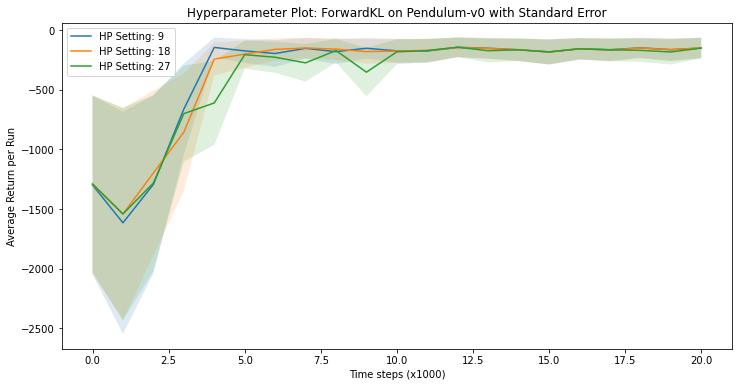

In [5]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()

weights = np.array(range(mean_all_results.shape[1])) + 1
weights = weights / np.linalg.norm(weights)

for hp_setting in range(all_results[0].shape[0]):    
    mean = mean_all_results[hp_setting]
    std = std_dev_all_results[hp_setting]

    x = np.arange(0, mean.shape[0])
    ax.fill_between(x, mean - std, mean + std, alpha=0.15)
    ax.plot(x, mean, label=f"HP Setting: {HP_SWEEPS[hp_setting]}")

ax.set_title(f"Hyperparameter Plot: {AGENT_NAME} on {ENV_NAME} with Standard Error")
ax.set_xlabel("Time steps (x1000)")
ax.set_ylabel("Average Return per Run")
ax.legend()

fig.show()